In [1]:
from toylib_projects.dotsAndBoxes import dots_and_boxes
from toylib_projects.dotsAndBoxes import players
from toylib_projects.dotsAndBoxes.interfaces import visualize

In [2]:
from IPython.display import clear_output


def play_interactive(game, player_fns: list[callable] | None = None):
    """player_fns is a list of player functions, one for each player."""
    if not player_fns:
        player_fns = [players.human_player, players.human_player]
    assert len(player_fns) == 2, "There must be exactly two player functions."

    last_action = -1
    while not game.game_over():
        visualize.plot_dots_and_boxes(game)
        print("Available moves:", game.valid_actions)
        try:
            move = player_fns[game.next_player](game, last_action)
        except ValueError as e:
            clear_output(wait=True)
            print("Invalid input. Please enter a number.")
            continue
        if move in game.valid_actions:
            game = game.move(move)
            last_action = move
            clear_output(wait=True)
        elif move == -1:
            print("Exiting the game.")
            return game
        else:
            print("Invalid move. Try again.")

    visualize.plot_dots_and_boxes(game)
    print("Game over!")
    print("Winner: ", game.get_winner())

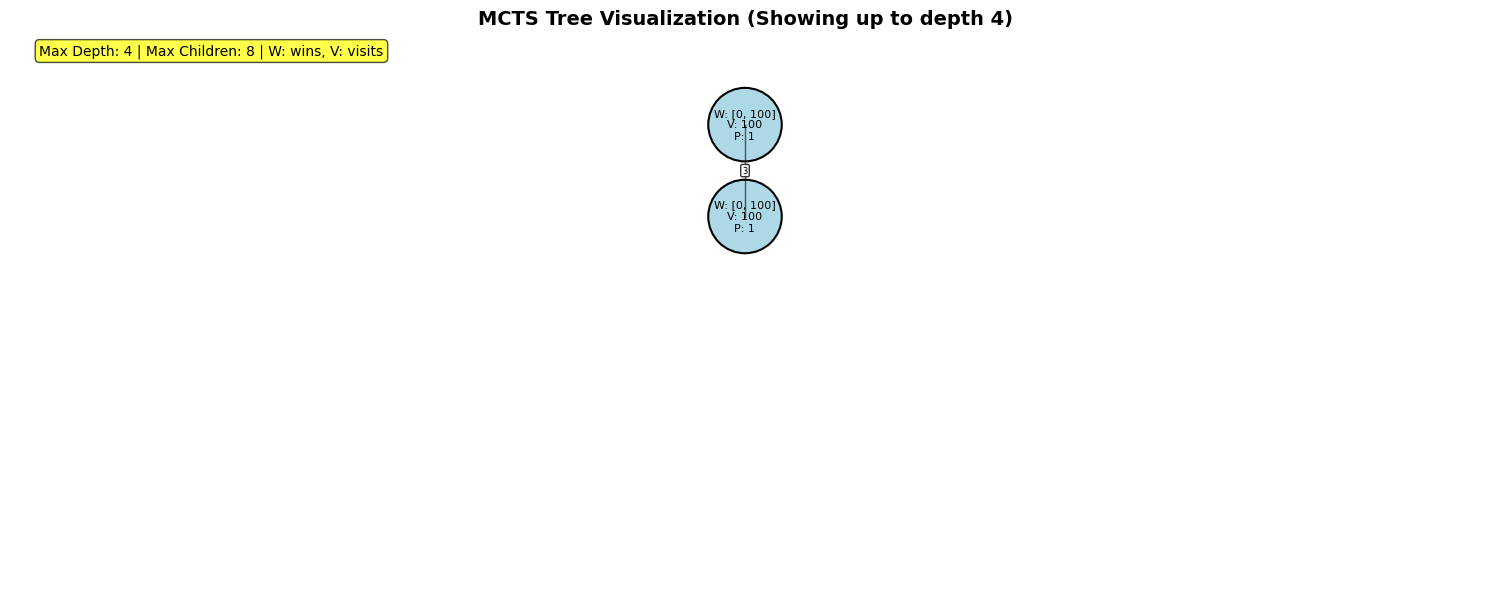

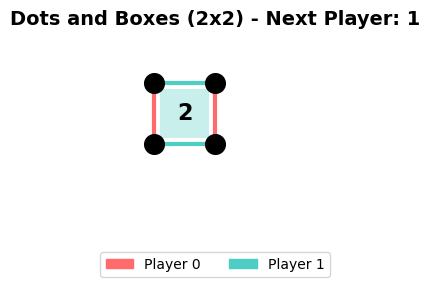

Game over!
Winner:  1


In [3]:
mcts_player = players.MCTSPlayer(
    policy_fn=players.random_policy,
    max_simulations=100,
    debug=True,
    wait_for_input=True,
)

player_fns_human_mcts = [
    mcts_player,
    mcts_player,
    # human_player,
]

game = dots_and_boxes.DotsAndBoxesGame(rows=2, cols=2)
updated_game = play_interactive(game=game, player_fns=player_fns_human_mcts)

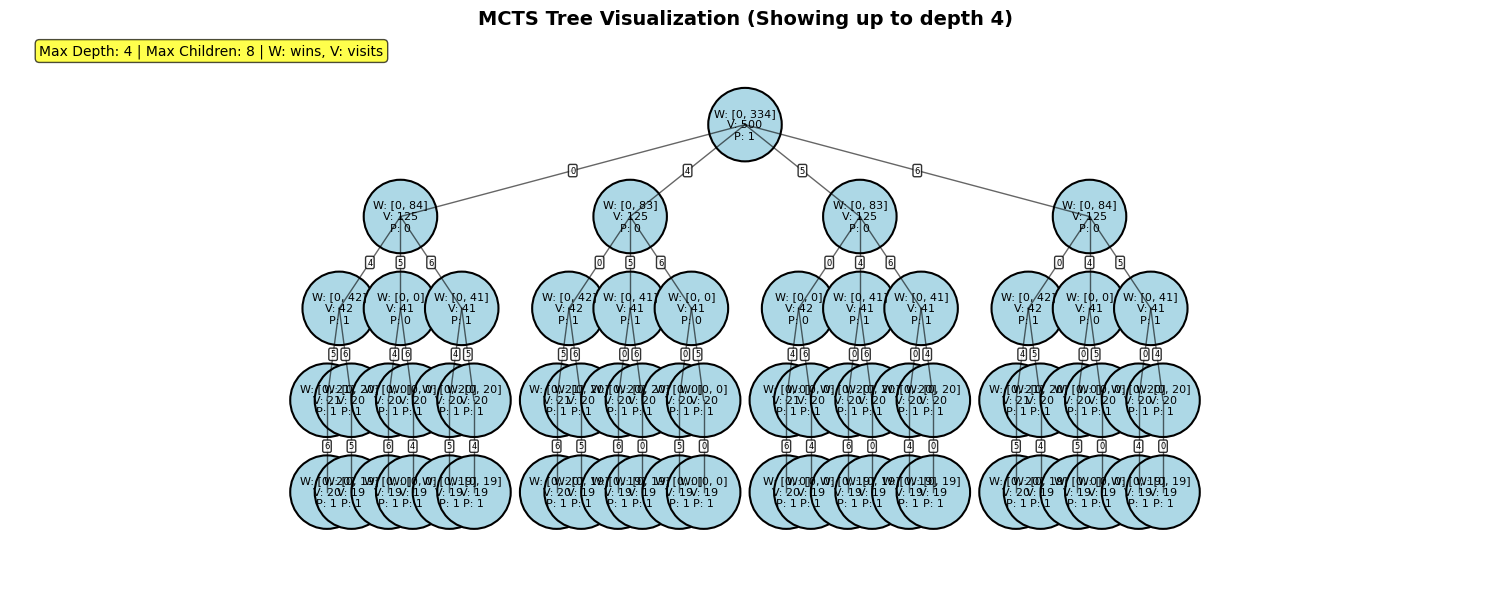

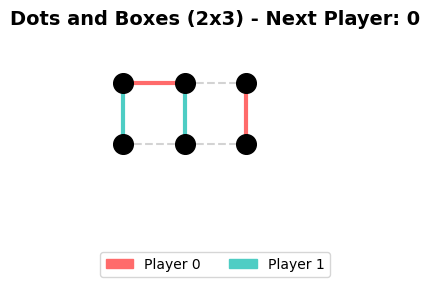

Available moves: [4 5 6]
Exiting...
Exiting the game.


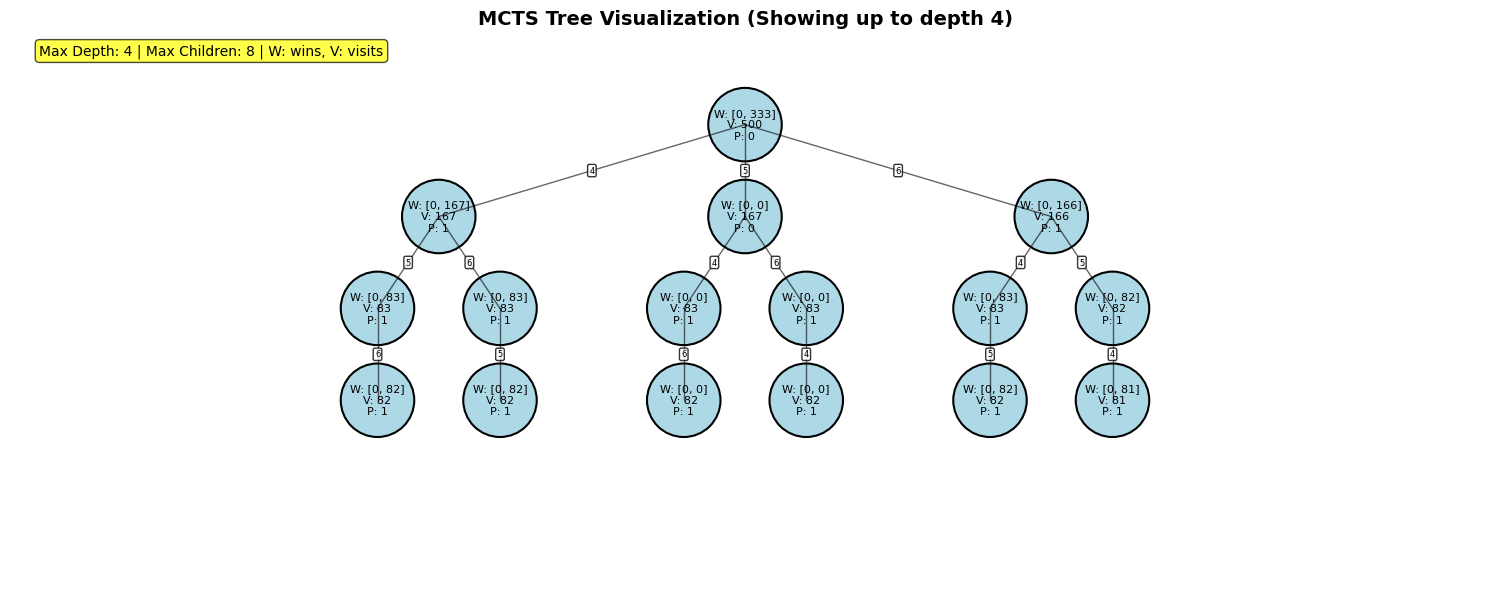

In [4]:
mcts_player = players.MCTSPlayer(
    policy_fn=players.random_policy,
    max_simulations=500,
    debug=True,
    wait_for_input=True,
)

player_fns = [
    # players.human_player,
    mcts_player,
    mcts_player,
    # human_player,
]

game = dots_and_boxes.DotsAndBoxesGame(rows=2, cols=3)
updated_game = play_interactive(game=game, player_fns=player_fns)

In [8]:
updated_game.to_dict()

{'rows': 2,
 'cols': 3,
 'next_player': 0,
 'filled_vertical': [[True, True, True]],
 'filled_horizontal': [[True, False], [False, False]],
 'boxes_by_player': [[[False, False]], [[False, False]]],
 'line_owners': {'vertical': [[1, 1, 0]], 'horizontal': [[0, -1], [-1, -1]]},
 'scores': [0, 0]}

In [14]:
d = {
    'rows': 2,
    'cols': 3,
    'next_player': 0,
    'filled_vertical': [[True, True, True]],
    'filled_horizontal': [[True, False], [False, False]],
    'boxes_by_player': [[[False, False]], [[False, False]]],
    'line_owners': {'vertical': [[1, 1, 0]], 'horizontal': [[0, -1], [-1, -1]]},
    'scores': [0, 0]
}
g = dots_and_boxes.DotsAndBoxesGame(rows=2, cols=3)
g.load_from_dict(d)

In [15]:
g.to_dict()

{'rows': 2,
 'cols': 3,
 'next_player': 0,
 'filled_vertical': [[True, True, True]],
 'filled_horizontal': [[True, False], [False, False]],
 'boxes_by_player': [[[False, False]], [[False, False]]],
 'line_owners': {'vertical': [[1, 1, 0]], 'horizontal': [[0, -1], [-1, -1]]},
 'scores': [0, 0]}